<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
x = iris.data
y = iris.target
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridresult = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
gridresult.fit(trainx, trainy)
bestparam = gridresult.best_params_
print(bestparam)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [2]:
bestaccuracy = gridresult.best_score_
print(bestaccuracy)

0.9583333333333334


In [3]:
bestmodel = gridresult.best_estimator_
testaccuracy = bestmodel.score(testx, testy)
print(testaccuracy)

1.0


In [5]:
predictions = bestmodel.predict(testx)
print(predictions[:10])
print(accuracy_score(testy, predictions))
conf = confusion_matrix(testy, predictions)
print(conf)
print(classification_report(testy, predictions))

[1 0 2 1 1 0 1 2 1 1]
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
x = iris.data
y = iris.target
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(x, y)
print(model.oob_score_)

0.9533333333333334


In [8]:
predictions = model.predict(x)
print(predictions[:10])
print(accuracy_score(y, predictions))

[0 0 0 0 0 0 0 0 0 0]
1.0


In [9]:
conf = confusion_matrix(y, predictions)
print(conf)
print(classification_report(y, predictions))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

iris = load_iris()
x = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = ExtraTreesClassifier(random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print(accuracy_score(testy, predictions))
conf = confusion_matrix(testy, predictions)
print(conf)
print(classification_report(testy, predictions))
print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.08897018 0.06481646 0.44348388 0.40272948]


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions[:10])
print(accuracy_score(y_test, predictions))
conf = confusion_matrix(y_test, predictions)
print(conf)
print(classification_report(y_test, predictions))

print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.00311008 0.01221875 0.69496395 0.28970722]


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

iris = load_iris()
x = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = XGBClassifier(tree_method = 'hist', random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print(accuracy_score(testy, predictions))
conf = confusion_matrix(testy, predictions)
print(conf)
print(classification_report(testy, predictions))
print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.0110771  0.02904883 0.75245064 0.20742337]


In [8]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

iris = load_iris()
x = iris.data
y = iris.target

model = XGBClassifier(tree_method = 'hist', random_state=42)

scores = cross_validate(model, x, y, return_train_score=True)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

model.fit(x, y)
predictions = model.predict(x)
print(predictions[:10])
print(accuracy_score(y, predictions))
conf = confusion_matrix(y, predictions)
print(conf)
print(classification_report(y, predictions))
print(model.feature_importances_)

1.0
0.9533333333333334
[0 0 0 0 0 0 0 0 0 0]
1.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[0.00959796 0.01645038 0.6765859  0.2973658 ]


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data
y = iris.target

model = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

model.fit(x, y)
predictions = model.predict(x)
print(predictions[:10])
print(accuracy_score(y, predictions))
conf = confusion_matrix(y, predictions)
print(conf)
print(classification_report(y, predictions))
print(model.feature_importances_)

0.9733333333333333
0.9733333333333334
[0 0 0 0 0 0 0 0 0 0]
0.9733333333333334
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[0.         0.         0.58561555 0.41438445]


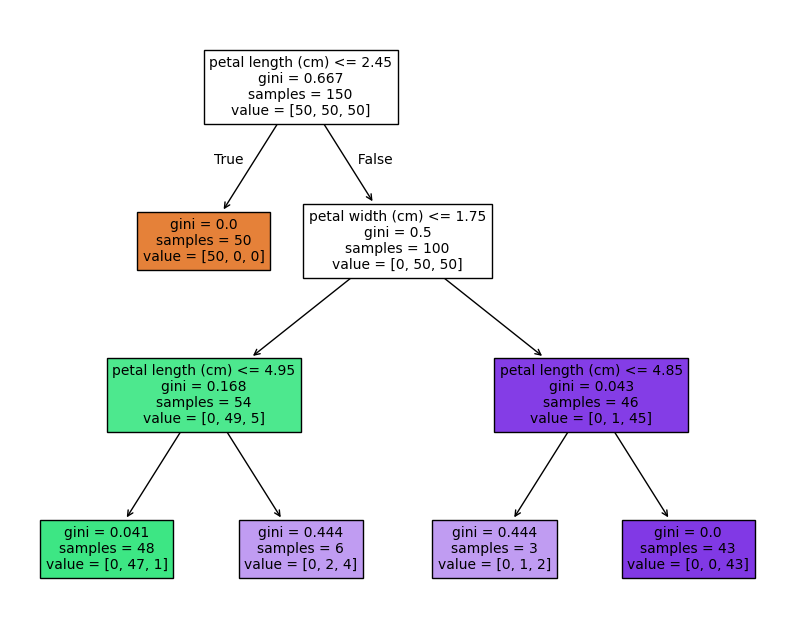

In [15]:
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names)
plt.show()

In [1]:
from google.colab import drive
drive.mount ('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/carprice.csv', header=0, index_col=0)
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       year transmission  mileage fuelType  tax   mpg  engineSize  price
model                                                                   
 A1    2017       Manual    15735   Petrol  150  55.4         1.4  12500
 A6    2016    Automatic    36203   Diesel   20  64.2         2.0  16500
 A1    2016       Manual    29946   Petrol   30  55.4         1.4  11000
 A4    2017    Automatic    25952   Diesel  145  67.3         2.0  16800
 A3    2019       Manual     1998   Petrol  145  49.6         1.0  17300


In [4]:
df = data.dropna()
df.dtypes

,0
year,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64
price,int64


In [5]:
print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto']


In [6]:
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2})
x = df[['transmission', 'mileage', 'mpg']]
y = df['price']
model = DecisionTreeRegressor(random_state=42)
fit = model.fit(x, y)
pred = fit.predict(x)
print(pred[:10])

[12500. 16500. 11000. 16800. 19391. 13900. 13250. 11750. 10200. 12000.]


In [9]:
mse = mean_squared_error(y, pred)
mae = mean_absolute_error(y, pred)
print(mse)
print(np.sqrt(mse))
print(mae)

2027625.3066388879
1423.9470870221576
257.95122868112185


In [8]:
print(model.feature_importances_)

[0.06192826 0.36144891 0.57662283]
